### Step 1: Import Libraries and Define Data

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()


### Step 2: Build the Neural Network

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Linear transformation from 1 input to 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Linear transformation from 64 to 32 neurons
        self.fc3 = nn.Linear(32, 5)   # Linear transformation from 32 to 5 neurons (for each country)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU non-linearity
        x = torch.relu(self.fc2(x))  # Apply ReLU non-linearity
        x = self.fc3(x)              # Linear output layer
        return x

model = SimpleNN()


### Step 3: Define Loss Function and Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Step 4: Train the Model

In [10]:
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(years)
    loss = criterion(outputs, gdp_growth_data)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 11.871803283691406
Epoch 100, Loss: 11.871767044067383
Epoch 200, Loss: 11.871744155883789
Epoch 300, Loss: 11.934774398803711
Epoch 400, Loss: 11.871671676635742
Epoch 500, Loss: 11.871646881103516
Epoch 600, Loss: 11.964223861694336
Epoch 700, Loss: 11.871630668640137
Epoch 800, Loss: 11.871586799621582
Epoch 900, Loss: 11.871557235717773
Epoch 1000, Loss: 11.903528213500977
Epoch 1100, Loss: 11.871557235717773
Epoch 1200, Loss: 11.890050888061523
Epoch 1300, Loss: 11.871500015258789
Epoch 1400, Loss: 11.87145709991455
Epoch 1500, Loss: 11.888548851013184
Epoch 1600, Loss: 11.896642684936523
Epoch 1700, Loss: 11.875526428222656
Epoch 1800, Loss: 11.891780853271484
Epoch 1900, Loss: 11.871356964111328
Epoch 2000, Loss: 11.87451171875
Epoch 2100, Loss: 11.886682510375977
Epoch 2200, Loss: 11.878713607788086
Epoch 2300, Loss: 11.87358570098877
Epoch 2400, Loss: 11.872350692749023
Epoch 2500, Loss: 11.947150230407715
Epoch 2600, Loss: 11.938632011413574
Epoch 2700, Loss: 1

### Step 5: Predicting Future GDP Growth

In [11]:
model.eval()
with torch.no_grad():
    future_years = torch.tensor(np.arange(2024, 2034), dtype=torch.float32).view(-1, 1)
    future_predictions = model(future_years)


### Step 6: Visualize the Results

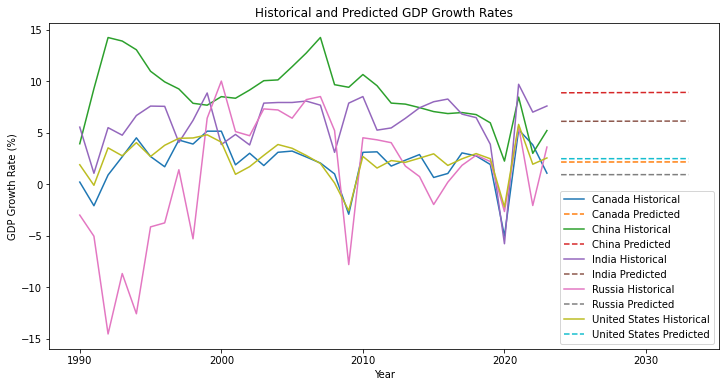

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].numpy(), label=f'{country} Historical')
    plt.plot(np.arange(2024, 2034), future_predictions[:, i].detach().numpy(), linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Historical and Predicted GDP Growth Rates')
plt.legend()
plt.show()
